<a href="https://colab.research.google.com/github/kavitapatil27/Machine-Learning-Projects/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*AUTHOR - KAVITA PATIL*## 

#**TASK 7 - STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS**#

In [ ]:
#INSTALL YFINANCE TO IMPORT DATA FROM YAHOO FINANCE
!pip install yfinance --upgrade --quiet

     |████████████████████████████████| 6.3MB 34.8MB/s 


In [ ]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf

In [ ]:
#DATA FOR BSE SENSEX IS DOWNLOADED FROM '01-01-2015' TO '03-06-2021'
data = yf.download("^BSESN", start="2015-01-01", end="2021-06-03")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(1574, 6)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


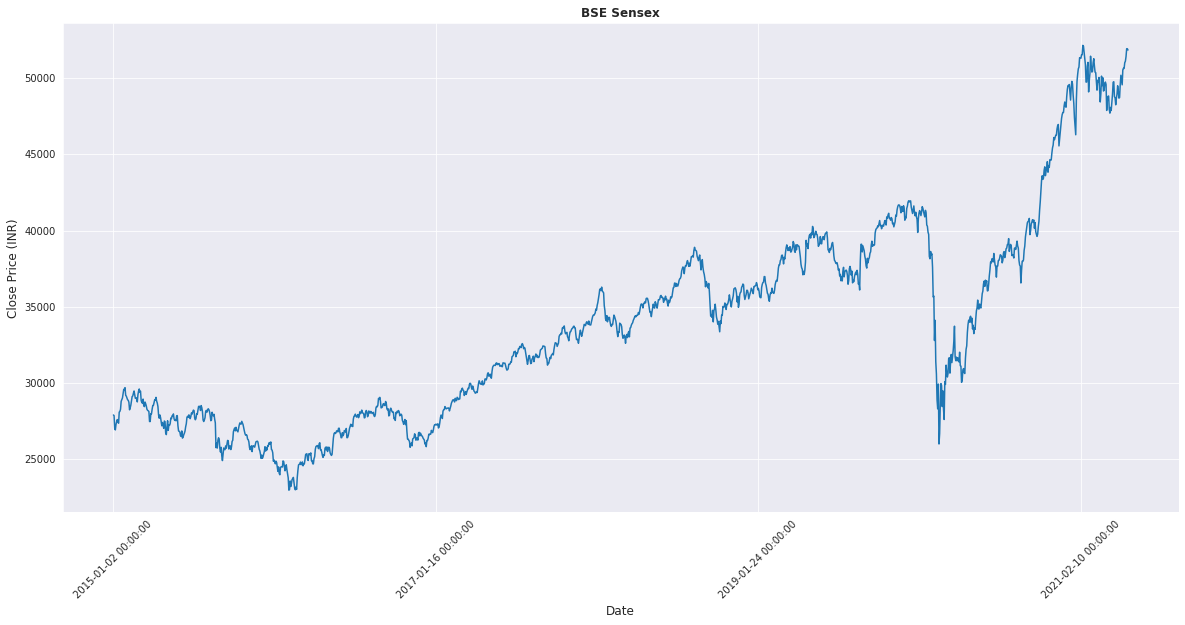

In [ ]:
#PLOT THE GRAPH FOR 'CLOSED' PRICES WITHIN THE PERIOD 
sns.set_style("darkgrid")
plt.figure(figsize = (20,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("BSE Sensex",fontsize=12, fontweight='bold')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price (INR)',fontsize=12)
plt.show()

**</H5> DATA PRE-PROCESSING FOR FURTHER ANALYSIS</H5>**

---



---



In [ ]:
#IMPORT REQUIRED LIBRARIES TO SCALE AND SPLIT THE DATA FOR VALIDATION AND PREDICTION
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data_close_price=data['Close']
data_close_price

0       27887.900391
1       27842.320312
2       26987.460938
3       26908.820312
4       27274.710938
            ...     
1569    51115.218750
1570    51422.878906
1571    51937.441406
1572    51934.878906
1573    51849.480469
Name: Close, Length: 1574, dtype: float64

In [ ]:
#SCALE THE DATA USING MINMAXSCALER 
scaler=MinMaxScaler(feature_range=(0,1))
transformed_data=scaler.fit_transform(np.array(data_close_price).reshape(-1,1))

In [ ]:
transformed_data.shape

(1574, 1)

In [ ]:
#SPLIT THE DATA SIZE INTO TRAINING AND TEST SIZE
train_size=int(len(transformed_data)*0.65)
test_size=int(len(transformed_data)-train_size)
train_size,test_size

(1023, 551)

In [ ]:
#SPLIT THE ORIGINAL DATASET INTO TRAIN AND TEST DATA BASED ON THEIR RESPECTIVE SIZES
train_data,test_data=transformed_data[0:train_size,:],transformed_data[train_size:len(transformed_data),:1]

In [ ]:
len(train_data),len(test_data)

(1023, 551)

Here we are going to take past 100 values into consideration and shift the values one by one. 
e.g: 

1.   120,125,456,478.....365,371 --> 655
2.   125,456,478.....371 -->662
3.   and so on



In [ ]:
#CREATE A FUNCTION TO SHIFT THE PRICES BY USING TIMESTEP=1
def Timestep_Data(Data_set,timestep=1):
  data_x,data_y=[],[] 
  for i in range(len(Data_set)-timestep-1):
    a=Data_set[i:(i+timestep),0]
    data_x.append(a)
    data_y.append(Data_set[i+timestep,0])
  
  return np.array(data_x),np.array(data_y)
    


In [ ]:
timestep=100
x_train,y_train= Timestep_Data(train_data,timestep)
x_test,y_test= Timestep_Data(test_data,timestep)

In [ ]:
x_train,y_train

(array([[0.1690302 , 0.16746936, 0.13819566, ..., 0.15597679, 0.16699402,
         0.16769776],
        [0.16746936, 0.13819566, 0.1355027 , ..., 0.16699402, 0.16769776,
         0.14507593],
        [0.13819566, 0.1355027 , 0.14803221, ..., 0.16769776, 0.14507593,
         0.13305011],
        ...,
        [0.46914897, 0.46538937, 0.45792086, ..., 0.42964465, 0.42465079,
         0.43847341],
        [0.46538937, 0.45792086, 0.45459813, ..., 0.42465079, 0.43847341,
         0.44333912],
        [0.45792086, 0.45459813, 0.46483705, ..., 0.43847341, 0.44333912,
         0.44241895]]),
 array([0.14507593, 0.13305011, 0.13223582, 0.13069725, 0.12229379,
        0.12086103, 0.13316314, 0.11708497, 0.11894511, 0.12446694,
        0.12788992, 0.13289468, 0.14259151, 0.14945193, 0.1636303 ,
        0.16616976, 0.16361177, 0.16930656, 0.16642559, 0.16071749,
        0.16536369, 0.17358356, 0.17101293, 0.17604638, 0.18001767,
        0.17874824, 0.16217527, 0.15826939, 0.16127396, 0.1715399 ,
 

In [ ]:
print(x_train.shape,y_train.shape)

(922, 100) (922,)


In [ ]:
print(x_test.shape,y_test.shape)

(450, 100) (450,)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape

(922, 100, 1)

CREATE LSTM DATA MODEL

In [ ]:
#IMPORT REQUIRED LIBRARIES
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#INITIATE THE MODEL AND ADD LAYERS LSTM AND DENSE[HYPERPARAMETER TUNING WHENEVER NECESSARY]
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
#DISPLAY MODEL SUMMARY
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#FIT THE MODEL AND RUN THE ENTIRE DATASET REQUIRED NUMBER OF TIMES(EPOCHS) TO GET MINIMUM PREIDICTION AND VALIDATION LOSS
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,batch_size=100,verbose=1)

Epoch 1/500
10/10 [==============================] - 0s 32ms/step - loss: 8.9536e-05 - val_loss: 6.1651e-04
Epoch 2/500
10/10 [==============================] - 0s 20ms/step - loss: 8.1283e-05 - val_loss: 5.9830e-04
Epoch 3/500
10/10 [==============================] - 0s 20ms/step - loss: 7.7379e-05 - val_loss: 6.2243e-04
Epoch 4/500
10/10 [==============================] - 0s 19ms/step - loss: 7.8970e-05 - val_loss: 5.2044e-04
Epoch 5/500
10/10 [==============================] - 0s 19ms/step - loss: 8.4810e-05 - val_loss: 5.1882e-04
Epoch 6/500
10/10 [==============================] - 0s 19ms/step - loss: 8.7341e-05 - val_loss: 5.5798e-04
Epoch 7/500
10/10 [==============================] - 0s 18ms/step - loss: 8.2342e-05 - val_loss: 5.6613e-04
Epoch 8/500
10/10 [==============================] - 0s 19ms/step - loss: 7.2074e-05 - val_loss: 5.0093e-04
Epoch 9/500
10/10 [==============================] - 0s 18ms/step - loss: 7.3678e-05 - val_loss: 5.2202e-04
Epoch 10/500
10/10 [========

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
#PREDICT TRAINING AND TEST VALUES
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
#TRANSFORM THE PREDICTED DATA TO ORIGINAL FORM
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#CALCULATE MEAN SQUARED ERROR OF TRAIN AND TEST VALUES
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

30674.723366317186

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

41019.73305486662

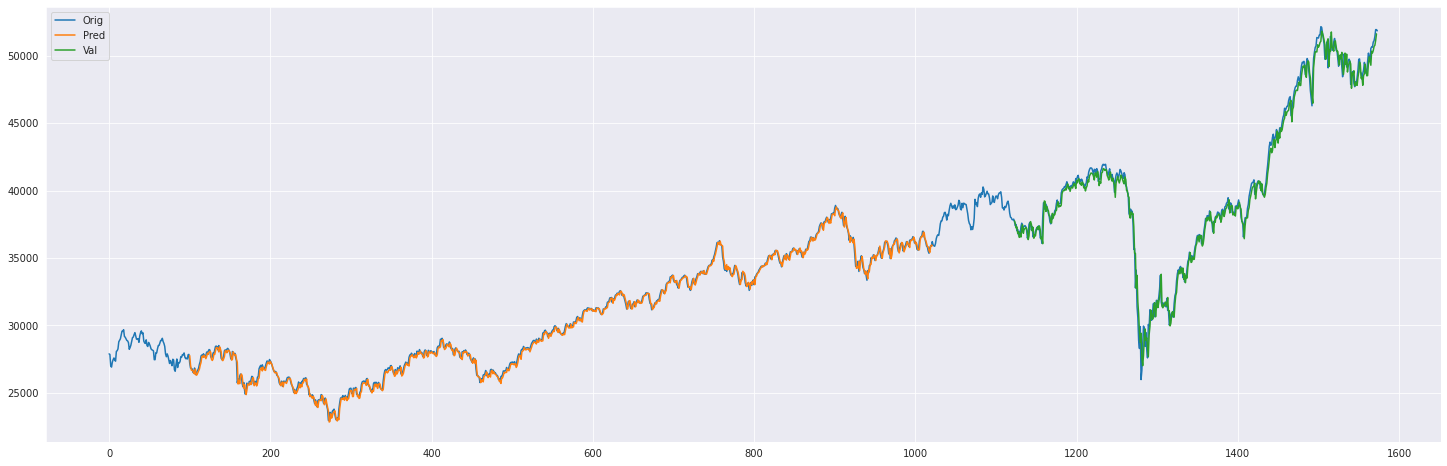

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(transformed_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(transformed_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(transformed_data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(25,8))
plt.plot(scaler.inverse_transform(transformed_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Orig','Pred','Val'],loc="upper left")
plt.show()

In [ ]:

len(test_data)

551

In [ ]:
#CONSIDER LAST 100 PRICE VALUES
x_input=test_data[451:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# DEMONSTRATE PREDICTIONS FOR NEXT 30 DAYS
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98026174]
101
1 day input [0.87273784 0.86370695 0.86094216 0.88454275 0.90121296 0.90969822
 0.90884935 0.9119943  0.89317769 0.87706929 0.90562935 0.91911569
 0.91338466 0.8878311  0.86964934 0.83754021 0.81920021 0.79904461
 0.87831371 0.91930737 0.93499214 0.94726991 0.95128808 0.97242137
 0.97174706 0.97107288 0.97867944 0.97911712 1.         0.99828928
 0.98457995 0.97159684 0.95670316 0.91747881 0.91772159 0.95300242
 0.96182423 0.89541438 0.9210922  0.93640096 0.97570464 0.95520727
 0.94011401 0.94133823 0.9613507  0.97004971 0.9533581  0.93976328
 0.9386977  0.91944101 0.89940486 0.9213798  0.91840232 0.92799582
 0.89816486 0.87281796 0.89228146 0.93091123 0.90942561 0.9272557
 0.89744614 0.89888679 0.91465168 0.91754355 0.91223949 0.85375295
 0.87637719 0.88526762 0.88623849 0.85601452 0.84767199 0.86050903
 0.85358414 0.87098217 0.89007755 0.91711991 0.9182192  0.88453753
 0.88235141 0.86642774 0.88094848 0.89027004 0.90919486 0.89753134
 0.88140221 0.88283189 0.91187685 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(transformed_data)

1574

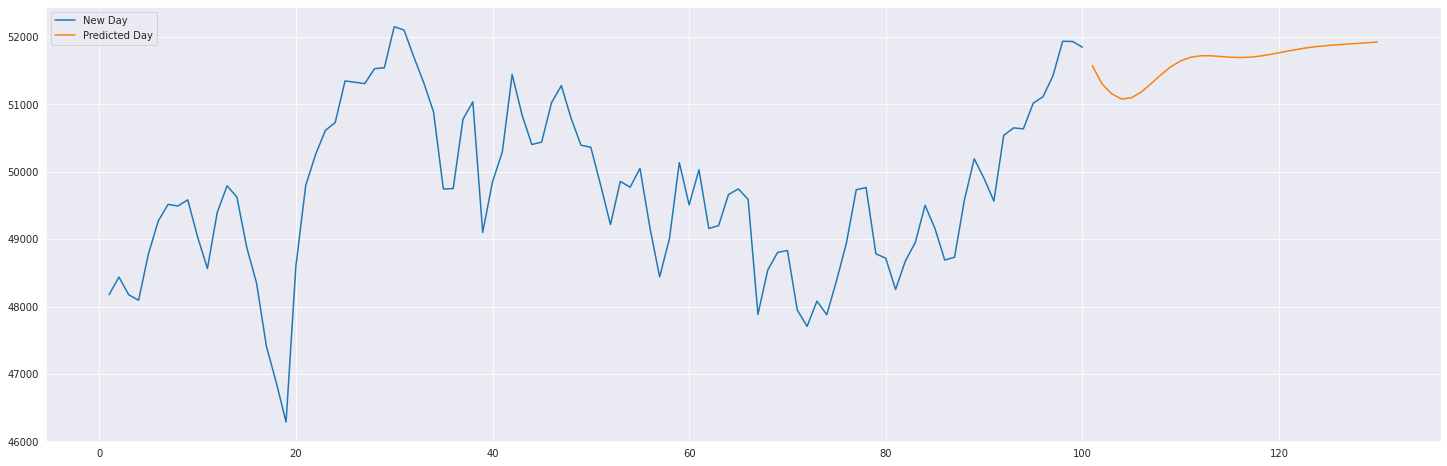

In [ ]:
#PLOT GRAPH WITH PREDICTED VALUES
plt.figure(figsize=(25,8))
#plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.plot(day_new,scaler.inverse_transform(transformed_data[1474:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(["New Day","Predicted Day"],loc="upper left")

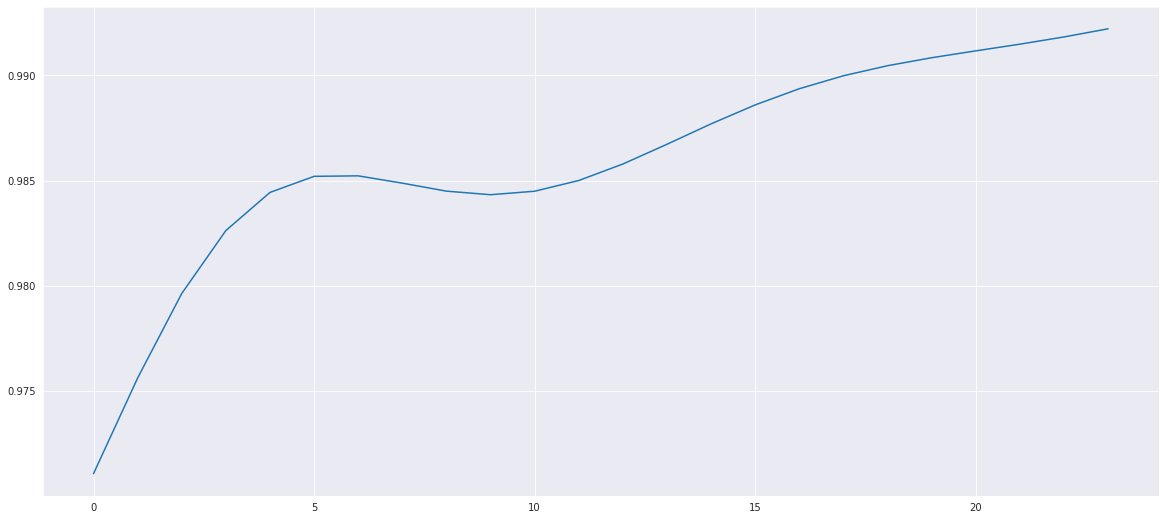

In [ ]:
transformed_data1=transformed_data.tolist()
transformed_data1.extend(lst_output)
plt.figure(figsize=(20,9))
plt.plot(transformed_data1[1580:])

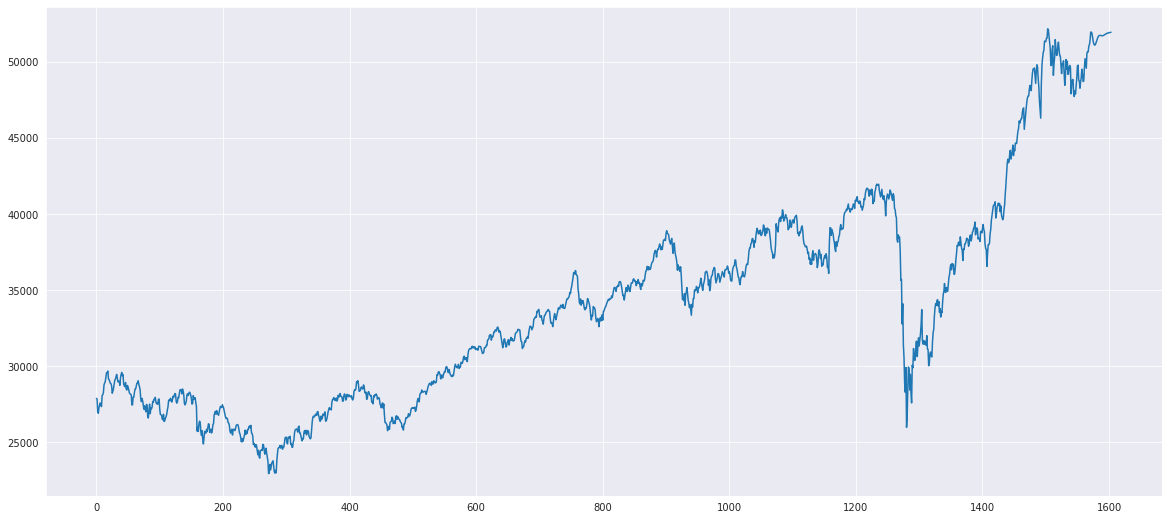

In [ ]:
transformed_data1=scaler.inverse_transform(transformed_data1).tolist()
plt.figure(figsize=(20,9))
plt.plot(transformed_data1)

**SENTIMENTAL ANALYSIS**

In [ ]:
#UPLOAD FILES
from google.colab import files
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (1).csv


In [ ]:
#READ THE DATA FROM THE FILE UPLOADED
news_data=pd.read_csv("india-news-headlines (1).csv",parse_dates=[0], infer_datetime_format=True,error_bad_lines=False,usecols =["publish_date","headline_text"])

In [ ]:
news_data=news_data.rename(columns={"publish_date": "Date"})
news_data.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [ ]:
news_data.tail()

,Date,headline_text
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...
3424066,2020-12-31,Celebs plan to party safely and responsibly on...


In [ ]:
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2021-06-03')
news_data=news_data.loc[(news_data['Date'] > start_date) & (news_data['Date'] < end_date)]

In [ ]:
news_data=news_data.reset_index()

In [ ]:
news_data=news_data.drop("index",axis=1)

In [ ]:
news_data.head()

,Date,headline_text
0,2015-01-02,Drink smart with these party tips
1,2015-01-02,How to say sorry to your kid
2,2015-01-02,Where to take your child on weekends
3,2015-01-02,Why Mediterranean diet is good for your heart
4,2015-01-02,The employee gifting guide


In [ ]:
news_data.tail()

,Date,headline_text
1383704,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
1383705,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
1383706,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
1383707,2020-12-31,Govt extends deadline for use of FASTag till F...
1383708,2020-12-31,Celebs plan to party safely and responsibly on...


In [ ]:
news_data['headline_text'] = news_data.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_data = news_data.drop_duplicates() 
news_data.reset_index(inplace = True, drop = True)

**PREPROCESSING DATA**

In [ ]:
news_data['headline_text'] = news_data['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news_data['headline_text'] = news_data['headline_text'].str.replace('[^\w\s]','')
news_data['headline_text'] = news_data['headline_text'].str.replace('\d','')


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
news_data['headline_text'] = news_data['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from textblob import Word

news_data['headline_text'] = news_data['headline_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2191 non-null   datetime64[ns]
 1   headline_text  2191 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 34.4+ KB


In [ ]:
news_data.head()

,Date,headline_text
0,2015-01-02,drink smart party tip say sorry kid take child...
1,2015-01-03,stylish new year cocktail recipe youll love de...
2,2015-01-04,get bikini body rule lovemaking apply work bak...
3,2015-01-05,recipe strawberry cupcake recipe kaju jeera ri...
4,2015-01-06,turn gardening happiness teeth jewellery lates...


In [ ]:
news_data.tail()

,Date,headline_text
2186,2020-12-27,biginterview dhritiman chatterjee nobody dare ...
2187,2020-12-28,horoscope today december check astrological pr...
2188,2020-12-29,man recovers charred remains thief burnt shop ...
2189,2020-12-30,numerology reading december prediction lucky c...
2190,2020-12-31,horoscope today december check astrological pr...


In [ ]:
news_data['headline_text'][0:10]

0    drink smart party tip say sorry kid take child...
1    stylish new year cocktail recipe youll love de...
2    get bikini body rule lovemaking apply work bak...
3    recipe strawberry cupcake recipe kaju jeera ri...
4    turn gardening happiness teeth jewellery lates...
5    exlovers friend water diet bad tip stay happy ...
6    home manicure recipe spiced beetroot disinfect...
7    spicy vodka shot lemon ice cube hard please pe...
8    step weight loss plan recipe kfclike fried chi...
9    website check buying book recipe pork chop sla...
Name: headline_text, dtype: object

In [ ]:
news_data[news_data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head()

,Date,headline_text


In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [ ]:
news_data['Subjectivity'] = news_data['headline_text'].apply(getSubjectivity)
news_data['Polarity'] = news_data['headline_text'].apply(getPolarity)
news_data.head()

,Date,headline_text,Subjectivity,Polarity
0,2015-01-02,drink smart party tip say sorry kid take child...,0.447703,0.042884
1,2015-01-03,stylish new year cocktail recipe youll love de...,0.409495,0.053030
2,2015-01-04,get bikini body rule lovemaking apply work bak...,0.412079,0.068680
3,2015-01-05,recipe strawberry cupcake recipe kaju jeera ri...,0.428616,0.091247
4,2015-01-06,turn gardening happiness teeth jewellery lates...,0.375562,0.041891


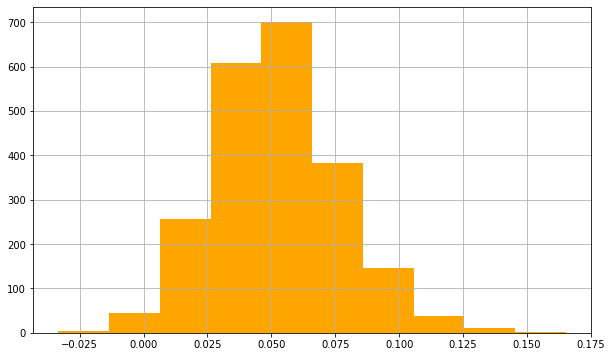

In [ ]:
plt.figure(figsize = (10,6))
news_data['Polarity'].hist(color = 'orange')

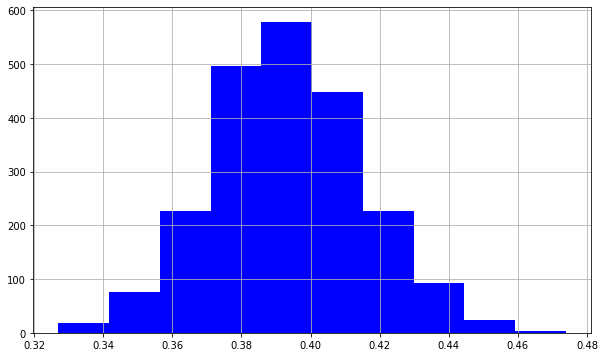

In [ ]:
plt.figure(figsize = (10,6))
news_data['Subjectivity'].hist(color = 'blue')

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sv = SentimentIntensityAnalyzer()

news_data['Compound'] = [sv.polarity_scores(v)['compound'] for v in news_data['headline_text']]
news_data['Negative'] = [sv.polarity_scores(v)['neg'] for v in news_data['headline_text']]
news_data['Neutral'] = [sv.polarity_scores(v)['neu'] for v in news_data['headline_text']]
news_data['Positive'] = [sv.polarity_scores(v)['pos'] for v in news_data['headline_text']]
news_data[0:5]

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-01-02,drink smart party tip say sorry kid take child...,0.447703,0.042884,-0.9986,0.153,0.714,0.134
1,2015-01-03,stylish new year cocktail recipe youll love de...,0.409495,0.053030,-0.9994,0.151,0.730,0.119
2,2015-01-04,get bikini body rule lovemaking apply work bak...,0.412079,0.068680,-0.9997,0.154,0.739,0.107
3,2015-01-05,recipe strawberry cupcake recipe kaju jeera ri...,0.428616,0.091247,-0.9949,0.141,0.728,0.130
4,2015-01-06,turn gardening happiness teeth jewellery lates...,0.375562,0.041891,-0.9996,0.151,0.737,0.112


In [ ]:
df_merge = pd.merge(data, news_data, how='inner', on='Date')
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,drink smart party tip say sorry kid take child...,0.447703,0.042884,-0.9986,0.153,0.714,0.134
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,recipe strawberry cupcake recipe kaju jeera ri...,0.428616,0.091247,-0.9949,0.141,0.728,0.130
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,turn gardening happiness teeth jewellery lates...,0.375562,0.041891,-0.9996,0.151,0.737,0.112
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,exlovers friend water diet bad tip stay happy ...,0.386203,0.018806,-0.9999,0.177,0.719,0.103
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,home manicure recipe spiced beetroot disinfect...,0.408204,0.043370,-0.9998,0.161,0.725,0.114


**HYBRID MODEL ANALYSIS**

In [ ]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,27887.900391,0.447703,0.042884,-0.9986,0.153,0.714,0.134
1,27842.320312,0.428616,0.091247,-0.9949,0.141,0.728,0.130
2,26987.460938,0.375562,0.041891,-0.9996,0.151,0.737,0.112
3,26908.820312,0.386203,0.018806,-0.9999,0.177,0.719,0.103
4,27274.710938,0.408204,0.043370,-0.9998,0.161,0.725,0.114
...,...,...,...,...,...,...,...
1469,46973.539062,0.378430,0.045076,-0.9995,0.151,0.739,0.110
1470,47353.750000,0.406816,0.042911,-0.9995,0.148,0.745,0.108
1471,47613.078125,0.414664,0.047399,-0.9998,0.164,0.727,0.109
1472,47746.218750,0.447592,0.031660,-0.9999,0.175,0.727,0.098


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.199039,0.822044,0.383842,0.00070,0.392523,0.411215,0.541667
1,0.197201,0.692013,0.627495,0.00255,0.280374,0.542056,0.508333
2,0.162730,0.330578,0.378839,0.00020,0.373832,0.626168,0.358333
3,0.159559,0.403075,0.262537,0.00005,0.616822,0.457944,0.283333
4,0.174313,0.552958,0.386291,0.00010,0.467290,0.514019,0.375000


In [ ]:
X=df_scaled.drop("Close",axis=1)
y=df_scaled["Close"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Model RMSE: ",rmse_rf)

Random Forest Model RMSE:  0.19894070870812067


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 1000) 
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)

mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGB Model RMSE: ",rmse_xgb)

[16:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Model RMSE:  0.19453548475917473


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 50,
                           colsample_bytree = 0.4,
                           num_leaves = 10)
lgbm.fit(X_train, y_train)
y_pred_lgbm=lgbm.predict(X_test)

mse_lgbm = metrics.mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

print("Light GBM Model RMSE: ",rmse_lgbm)

Light GBM Model RMSE:  0.19724476635329155


In [ ]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
y_pred_adb=adb.predict(X_test)

mse_adb = metrics.mean_squared_error(y_test, y_pred_adb)
rmse_adb = np.sqrt(mse_adb)

print("AdaBoost Model RMSE: ",rmse_adb)

AdaBoost Model RMSE:  0.19936935714336915


In the above analysis, when compared to different models, we found that XGBoost is the apt model with minimum RMSE.